In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv(r'CTR campaigns.csv')
df.head()

,attr_label_str,CAMPAIGN_CLICKS,CAMPAIGN_LOAD,CAMPAIGN_IMPRESSIONS
0,Test_one_shop_detail_HW,2,2,2
1,Upsell_tariff change_29.04,4171,12355,12355
2,20200410_ID_POSTPAID_HF_15GB_PART8,9141,16860,16860
3,20200618 InLife Agora S5a,3521,39521,39521
4,Easy Internet,0,0,10


In [4]:
df = df[(df.CAMPAIGN_IMPRESSIONS >= 1000)]
df = df[(df.CAMPAIGN_IMPRESSIONS >= df.CAMPAIGN_CLICKS)]
df

,attr_label_str,CAMPAIGN_CLICKS,CAMPAIGN_LOAD,CAMPAIGN_IMPRESSIONS
1,Upsell_tariff change_29.04,4171,12355,12355
2,20200410_ID_POSTPAID_HF_15GB_PART8,9141,16860,16860
3,20200618 InLife Agora S5a,3521,39521,39521
7,5.3_PRP Trodnevni flat,6279,23786,23786
8,NCP_iPhone_06.11.,1399,11540,11540
...,...,...,...,...
4582,Tariff change 24/07 ios,1393,12934,12934
4586,Magenta S no ebill,706,1650,1650
4589,Radovi_18.05.,558,4883,4883
4597,MaxTV 22/04,104,5085,5085


In [5]:
df['CTR'] = df['CAMPAIGN_CLICKS']/df['CAMPAIGN_IMPRESSIONS']
df.describe()

,CAMPAIGN_CLICKS,CAMPAIGN_LOAD,CAMPAIGN_IMPRESSIONS,CTR
count,2055.000000,2.055000e+03,2.055000e+03,2055.000000
mean,10598.110949,6.821522e+04,6.887261e+04,0.220910
std,28022.032682,1.698777e+05,1.700436e+05,0.195486
min,0.000000,0.000000e+00,1.001000e+03,0.000000
25%,904.000000,7.558000e+03,7.947000e+03,0.074444
50%,3176.000000,2.008400e+04,2.040800e+04,0.156841
75%,9942.000000,4.023150e+04,4.042950e+04,0.312913
max,525541.000000,1.659110e+06,1.659110e+06,0.994862


In [7]:
data = np.array(df['CTR'])
alpha, beta, loc, scale  = scipy.stats.distributions.beta.fit(data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [8]:
alpha

0.9809628968249227

In [9]:
beta

5.318600742609512

In [17]:
x = np.linspace(0,1, len(data))
fitted_data = scipy.stats.distributions.beta.pdf(x, alpha, beta, loc, scale)

Text(0, 0.5, 'Campaigns')

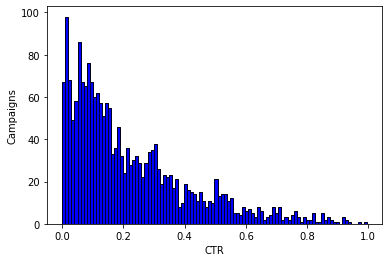

In [23]:
# matplotlib histogram
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = int(1/0.01))
#plt.plot(fitted_data, color = 'red')



# seaborn histogram
sns.distplot(y, hist=True, kde=False, 
             bins=int(1/0.01), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.xlabel('CTR')
plt.ylabel('Campaigns')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Text(0, 0.5, 'Density')

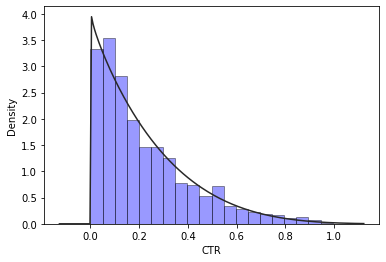

In [34]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data, hist=True, kde=False, fit=scipy.stats.beta,
             bins=int(1/0.05), color = 'blue', 
             hist_kws={'edgecolor':'black'})
# Add labels
plt.xlabel('CTR')
plt.ylabel('Density')